In [9]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
import seaborn as sns
from sklearn import preprocessing
%matplotlib inline

In [17]:
data = pd.read_csv(r'C:\Users\Acer\Desktop\Mahidi IIT\2nd YEAR\2nd Semester\ML\Assignment\Breast-Cancer-Wisconsin-master\wisconsin.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [18]:
data['radius_mean'].value_counts()
print(data.shape)

(569, 33)


In [19]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [21]:
data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [22]:
data['id'].nunique()

# it shows that all the data are unique that is., each and every row contains information of a cancerous cell is unique

569

In [23]:
# removing the id column as it is unique

data = data.drop('id', axis = 1)

print(data.shape)

(569, 32)


(array([ 19.,  79., 185., 129.,  55.,  50.,  38.,   7.,   4.,   3.]),
 array([ 6.981 ,  9.0939, 11.2068, 13.3197, 15.4326, 17.5455, 19.6584,
        21.7713, 23.8842, 25.9971, 28.11  ]),
 <a list of 10 Patch objects>)

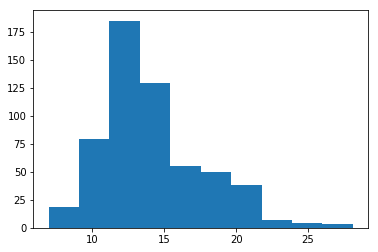

In [25]:
plt.hist(data['radius_mean'])

In [26]:
data.describe

<bound method NDFrame.describe of     diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0           M       17.990         10.38          122.80     1001.0   
1           M       20.570         17.77          132.90     1326.0   
2           M       19.690         21.25          130.00     1203.0   
3           M       11.420         20.38           77.58      386.1   
4           M       20.290         14.34          135.10     1297.0   
5           M       12.450         15.70           82.57      477.1   
6           M       18.250         19.98          119.60     1040.0   
7           M       13.710         20.83           90.20      577.9   
8           M       13.000         21.82           87.50      519.8   
9           M       12.460         24.04           83.97      475.9   
10          M       16.020         23.24          102.70      797.8   
11          M       15.780         17.89          103.60      781.0   
12          M       19.170         24.80   

In [27]:
# checking the different values contained in the diagnosis column

data['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

C:\Users\Acer\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6575: RuntimeWarning: All-NaN slice encountered
  xmin = min(xmin, np.nanmin(xi))
C:\Users\Acer\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6576: RuntimeWarning: All-NaN slice encountered
  xmax = max(xmax, np.nanmax(xi))


ValueError: max must be larger than min in range parameter.

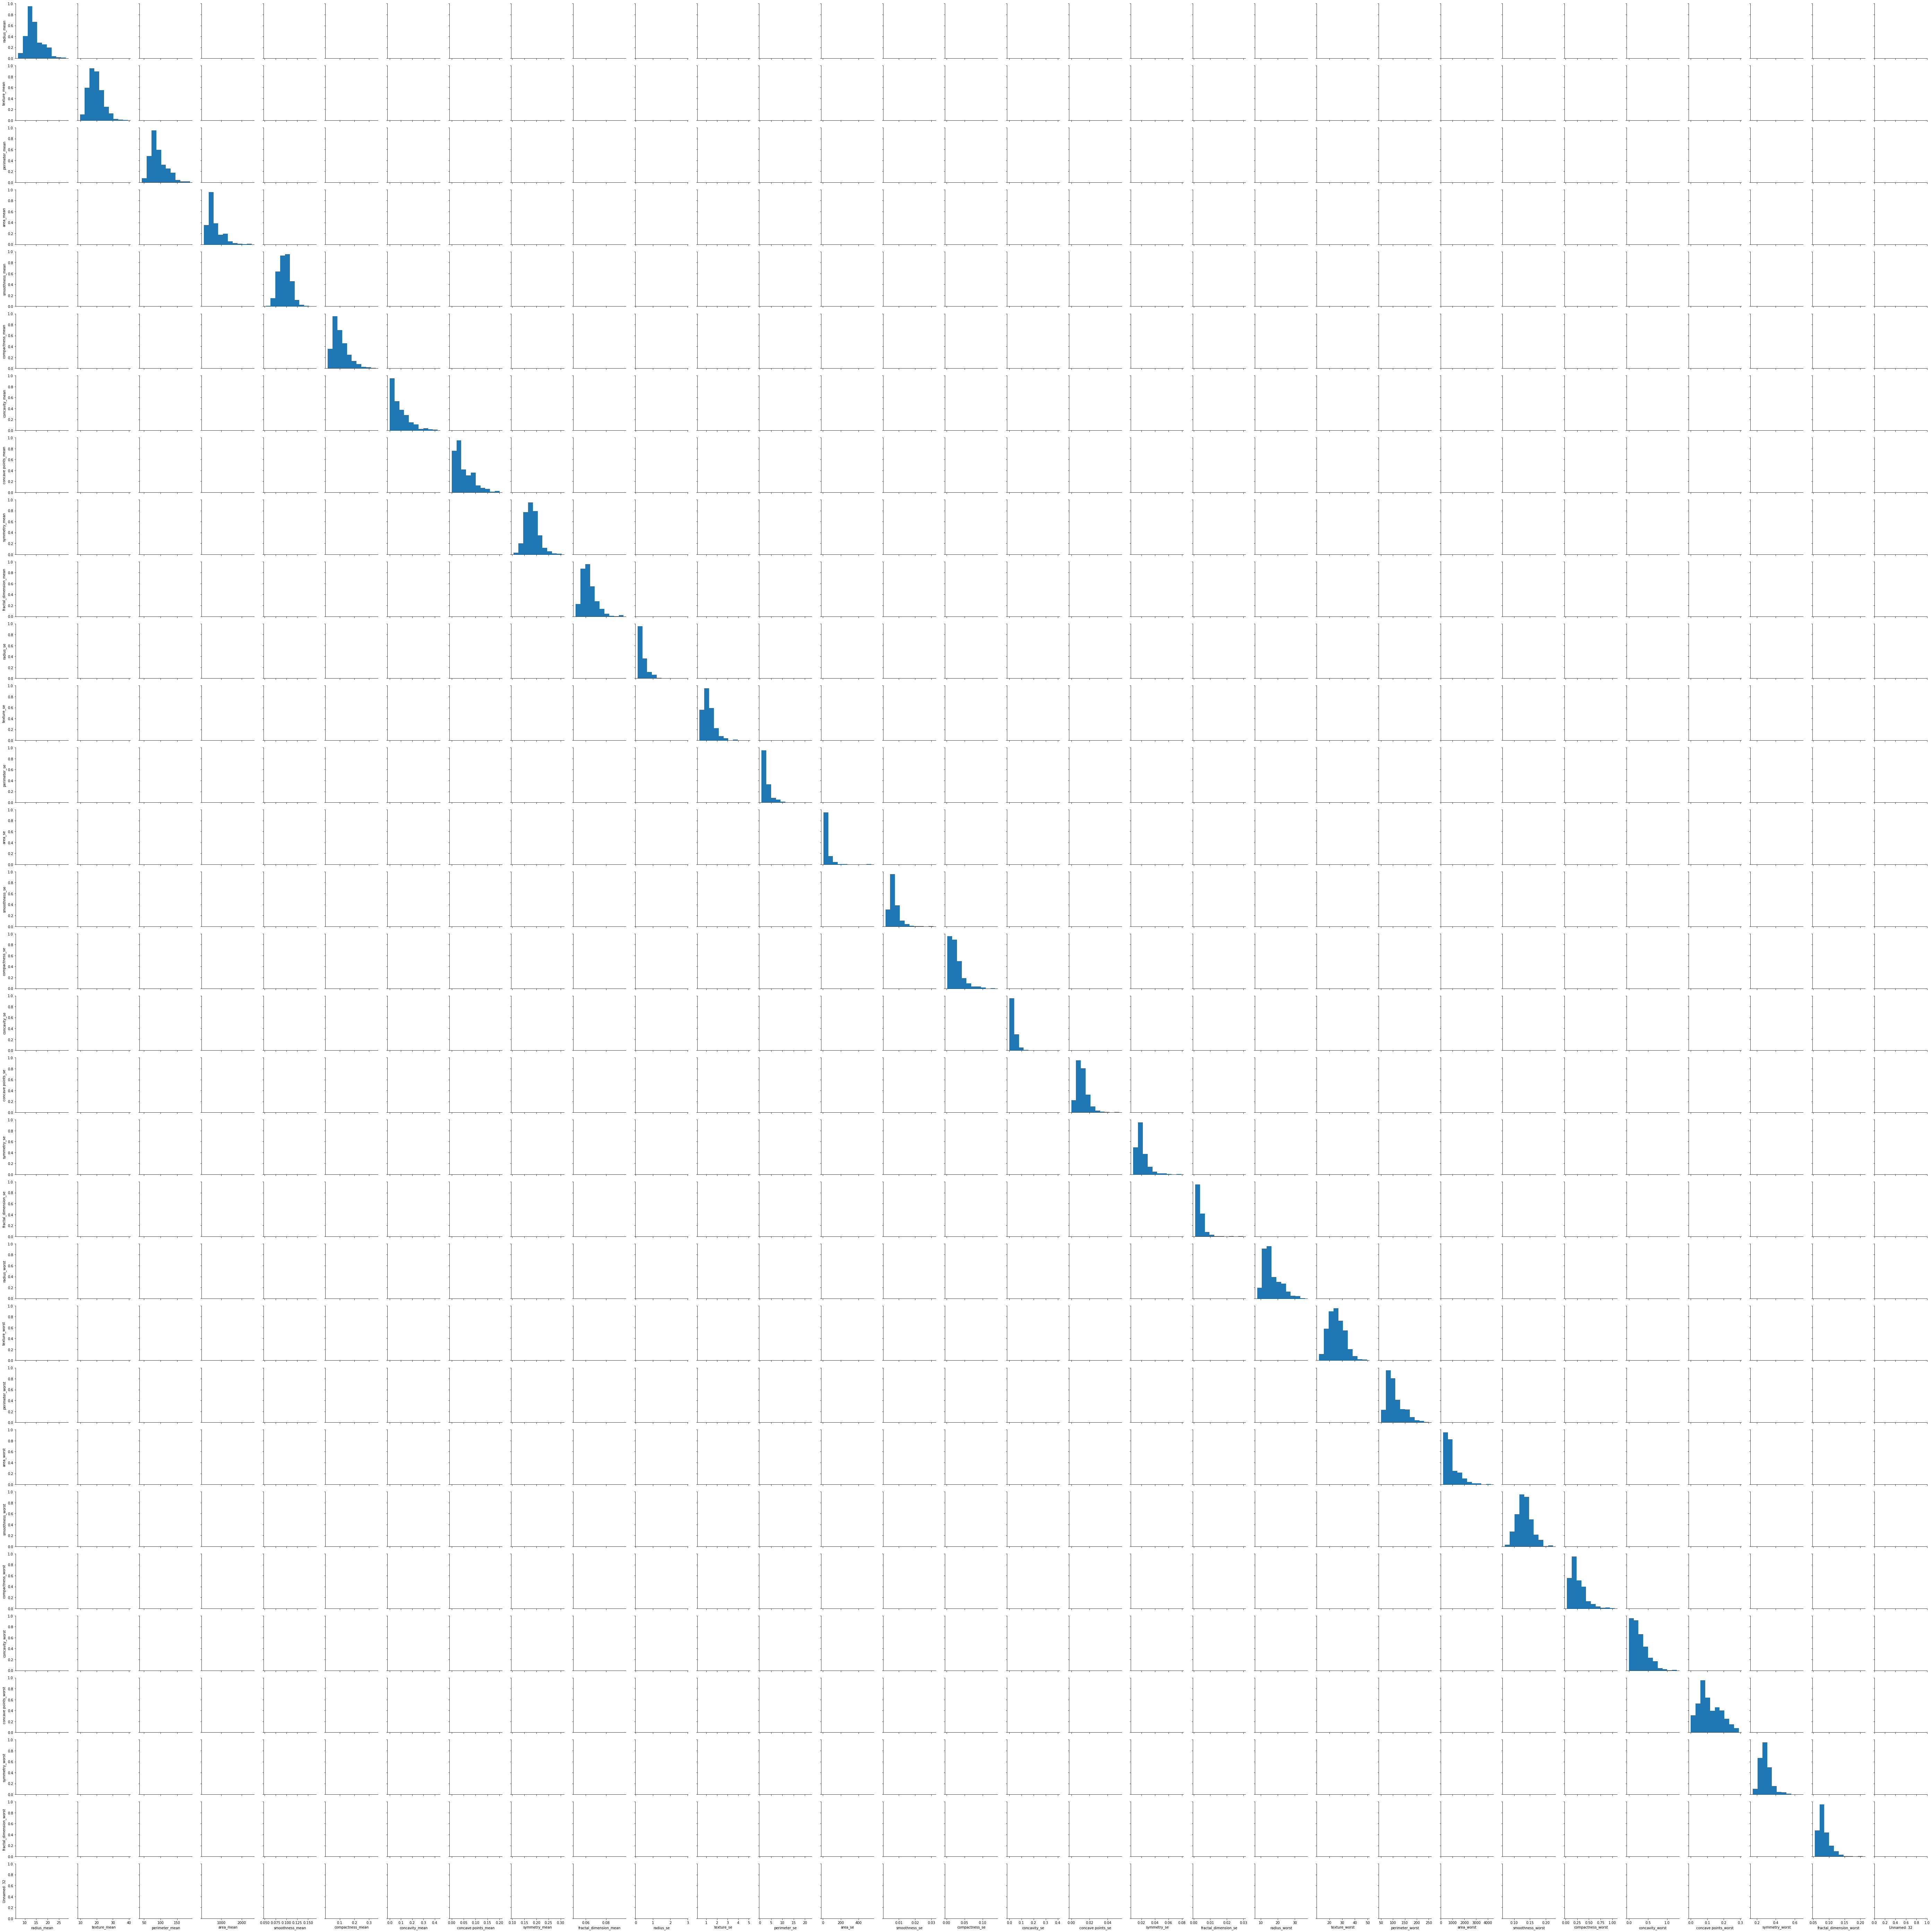

In [28]:
# plotting the pairplot

sns.pairplot(data)

In [ ]:

# from the graph, we can see that malign cells have greater radius than benign cells in general

fig = plt.figure(figsize = (6,6))
sns.barplot(x = 'diagnosis', y = 'radius_mean', data = data)

plt.title('Diagnosis vs radius_mean')

In [ ]:
# from the graph, we can see that malign cells have greater texture than benign cells in general

fig = plt.figure(figsize = (6,6))
sns.barplot(x = 'diagnosis', y = 'texture_mean', data = data)

plt.title('Diagnosis vs texture_mean')

In [ ]:
# from the graph, we can see that malign cells have greater perimeter than benign cells in general

fig = plt.figure(figsize = (6,6))
sns.barplot(x = 'diagnosis', y = 'perimeter_mean', data = data)

plt.title('Diagnosis vs perimeter_mean')

In [ ]:
# from the graph, we can see that malign cells have greater area than benign cells in general

fig = plt.figure(figsize = (6,6))
sns.barplot(x = 'diagnosis', y = 'area_mean', data = data)

plt.title('Diagnosis vs area_mean')

In [ ]:
# from the graph, we can see that malign cells have slightly greater smoothness than benign cells in general

fig = plt.figure(figsize = (6,6))
sns.barplot(x = 'diagnosis', y = 'smoothness_mean', data = data)

plt.title('Diagnosis vs smoothness_mean')

In [ ]:
# from the graph, we can see that malign cells have greater compactness than benign cells in general

fig = plt.figure(figsize = (6,6))
sns.barplot(x = 'diagnosis', y = 'compactness_mean', data = data)

plt.title('Diagnosis vs compactness_mean')

In [ ]:

# from the graph, we can see that malign cells have greater concavity than benign cells in general

fig = plt.figure(figsize = (6,6))
sns.barplot(x = 'diagnosis', y = 'concavity_mean', data = data)

plt.title('Diagnosis vs concavity_mean')

In [ ]:
# from the graph, we can see that malign cells have much greater concave points_mean than benign cells in general

fig = plt.figure(figsize = (6,6))
sns.barplot(x = 'diagnosis', y = 'concave points_mean', data = data)

plt.title('Diagnosis vs concave points_mean')

In [ ]:

# from the graph, we can see that malign cells have slightly greater symmetry than benign cells in general

fig = plt.figure(figsize = (6,6))
sns.barplot(x = 'diagnosis', y = 'symmetry_mean', data = data)

plt.title('Diagnosis vs symmetry_mean')

In [ ]:
# from the graph, we can see that malign cells have fractal dimension mean almost equal to that of benign cells in general

fig = plt.figure(figsize = (6,6))
sns.barplot(x = 'diagnosis', y = 'fractal_dimension_mean', data = data)

plt.title('Diagnosis vs fractal_dimension_mean')

C:\Users\Acer\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Diagnosis vs concavity_mean')

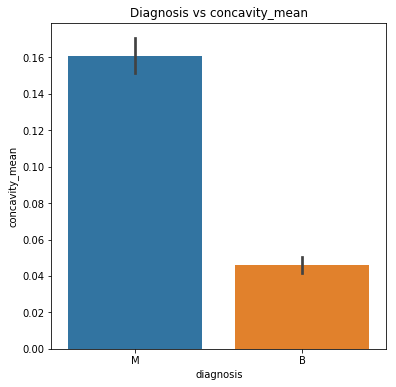

In [29]:
# from the graph, we can see that malign cells have greater concavity than benign cells in general

fig = plt.figure(figsize = (6,6))
sns.barplot(x = 'diagnosis', y = 'concavity_mean', data = data)

plt.title('Diagnosis vs concavity_mean')

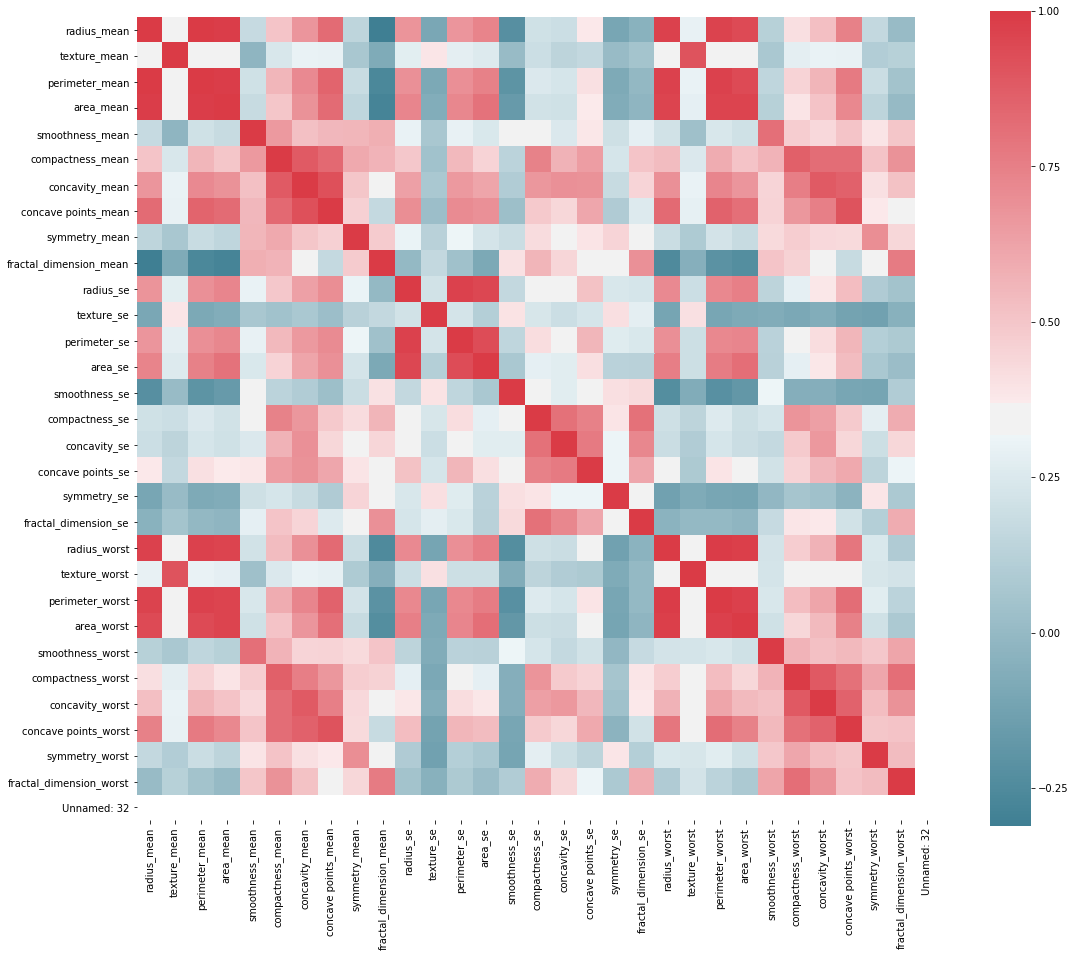

In [30]:
f, ax = plt.subplots(figsize=(18, 15))
corr = data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [31]:
# label encoding of the dependent variable

# importing label encoder
from sklearn.preprocessing import LabelEncoder

# performing label encoding
le = LabelEncoder()
data['diagnosis'] = le.fit_transform(data['diagnosis'])

# converting y again to a dataframe
#y = pd.DataFrame(y)

# determining the datatype of y
#type(y)

data['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [32]:
# splitting the dependent and independent variables from the dataset

x = data.iloc[:,1:]
y = data.iloc[:,0]

print(x.shape)
print(y.shape)

(569, 31)
(569,)


In [33]:
#splitting the dataset into training and testing sets

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 16)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(426, 31)
(426,)
(143, 31)
(143,)
